<a href="https://colab.research.google.com/github/suchy1713/expected_goals/blob/master/xg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/suchy1713/expected_goals/master/data.csv')
X = df.drop(['is_goal'], axis=1)
y = df['is_goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [3]:
!pip install shap

     |████████████████████████████████| 266kB 4.9MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383170 sha256=5f000281e3a00a9c690c0b86cf94aed05fc7784d3f52bfc5ae078c14218af53b
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [4]:
import xgboost as xgb

brain = xgb.XGBClassifier(max_depth=5, min_child_weight=5, subsample=0.56, colsample_bytree=0.72, learning_rate=0.214, n_estimators=200)
brain.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.72, gamma=0,
              learning_rate=0.214, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.56, verbosity=1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


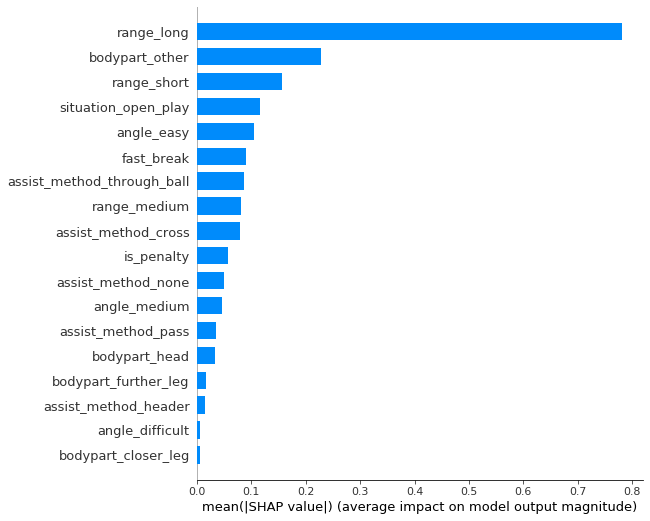

In [5]:
import shap

explainer = shap.TreeExplainer(brain)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

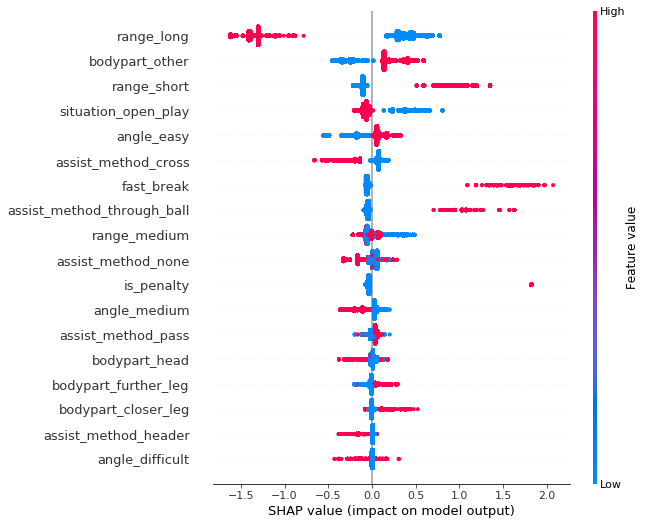

In [0]:
shap.summary_plot(shap_values, X_test)

Takeaways:<br>
1. Don't shoot from long range.
2. You're slightly more likely to score from the set piece than from open play.
3. You're more likely to score from fast break.
4. The most efficient assist method is through ball. Cross is the least efficient.

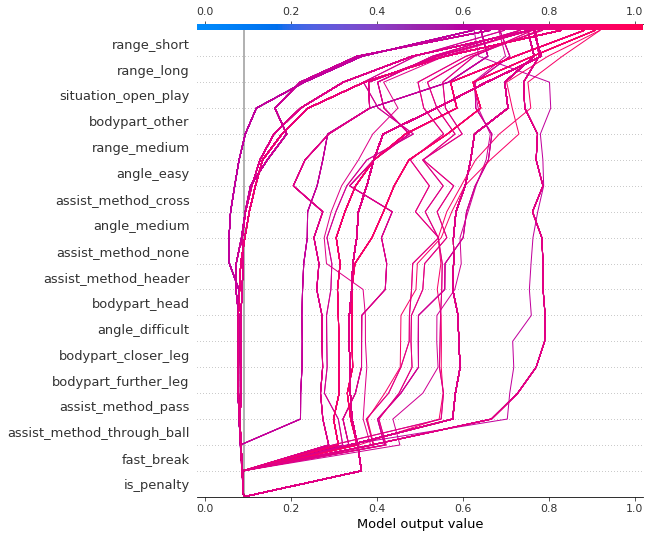

In [23]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]

y_pred = brain.predict_proba(X_test)[:, 1]
T = X_test[y_pred >= 0.6]
sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh, T, feature_order='hclust', link='logit')

Here is a plot of typical model paths for predictions with high goal probabilities. It lets to see what high-scoring predictions have incommon. There are two distinct paths: one dominated by "fast break" and "assist method-through ball" and the other by shot range.
<br><br>
<b>Conclusion:</b><br>
If you want to score more goals, maximize the amount of shots from short range, on fast break and assisted by through ball.